![title](header.png)

A support vector machine is a <i>supervised</i> algorithm that takes a number of catagorised data points with a number of attributes and finds an object that seperates the catagories. We will be looking at the application to classification, which looks very similar to K Nearest Neighbours but works better when data is seperated. We can then use the model to classify new data based on it's characteristics. Support vector machines are used in a wide variety of applications, including cancer diagnosis, which we'll have a look at later in this guide. By the end of this guide you should be comfortable explaining the theory behind support vector machines as well as applying it to some simple problems.

## The Support Vector Machine Algorithm

The best way to explain Support Vector Machines (SVMs) is in  two dimensional example, although this can be applied to any number of dimensions. We start with two sets of data points sorted into classes, and using a straight line, we try and seperate the two sets of points:

![Image of svn](svn.png)

From this we can see two important things - one is that there are infinitely many lines we can draw that seperate the two datasets, and the other is that the wider the gap between the datasets is, the easier it is for us to find a line that works. Typically, this algorithm is stronger on data that's been seperated, but there are workarounds for when this isn't the case.

More importantly - how do we find the best line of seperation? One answer, (and prehaps the most intuitive) is to find the line which has the greatest "margin" between the two points. Throught the power of maths, we can do this - and this process is the support vector machine algorithm.

## A Simple Example

For this simple example let's look at some simple x,y data that is categorised:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm

df = pd.read_csv("example.csv")

df.head()

,class,x data,y data
0,0,2.080281,9.675988
1,0,0.654487,8.406303
2,0,1.772212,9.421432
3,0,0.236009,9.317798
4,0,1.543208,8.849149


The first thing we need to do is unpack our data into the format that sklearn likes - this is a list of data points in one numpy array along with their classes in a seperate numpy array. We can do this easily with the <i>as_matrix</i> method:
    
    

In [2]:
points = df[["x data", "y data"]].as_matrix()
classes = df['class']

Now we have our data in the correct format, we can go ahead and use the SVC function to create our classification:

In [3]:
model = svm.SVC(kernel='linear')
model.fit(points,classes)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

We can then predict points using the <i>predict</i> method:

In [4]:
print(model.predict([[6,1], [1,6]]))

[1 0]


As with the nearest neighbours code, we can create a meshgrid to see the distribution of our predictions:

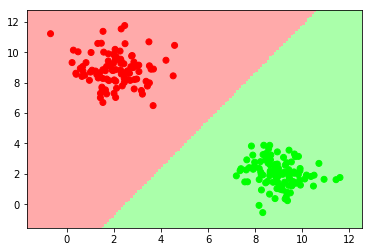

In [5]:
#Setting up the meshgrid require a minimum and maximum bound - it makes sense to use the min and max values of our data for this:

x_min, x_max = points[:, 0].min() - 1, points[:, 0].max() + 1
y_min, y_max = points[:, 1].min() - 1, points[:, 1].max() + 1

#h is the step size of the mesh - lower h means higher resolution.

h=0.1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

#Ravel will take the 2 dimensional xx and yy arrays and "unravel" them into a 1d array.
#c_ then pairs off these points to give a 1 dimensional array with x and y points for every point in the meshgrid.
#We then predict every point and call this Z, then reshape it so it's the same shape as xx and yy

Z = model.predict(np.c_[xx.ravel(),yy.ravel()]) 
Z = Z.reshape(xx.shape)

#We then define our own colormaps (you can skip this step if you want), and plot our data using a colormesh and a scatter plot.

from matplotlib.colors import ListedColormap

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(points[:, 0], points[:, 1], c=classes, cmap = cmap_bold)
plt.plot()
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

With a bit of work we can also plot the seperating line and margins of our model. This involves getting the outputs from our model and manipulating them until we get what we want:

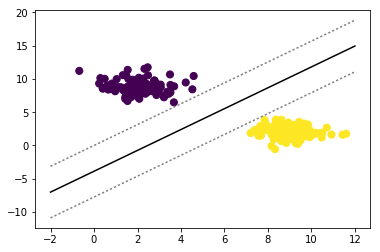

In [6]:
w = model.coef_[0]
a = -w[0] / w[1]

x = np.linspace (-2,12)
y = a * x - model.intercept_[0]/w[1]
margin = 1/np.sqrt(np.sum(model.coef_ ** 2))
y_down = y + a * margin
y_up = y - a * margin

plt.plot(x,y, color="black")
plt.plot(x,y_down, color= "grey", ls=":")
plt.plot(x,y_up, color="grey", ls=":" )
plt.scatter(points[:, 0], points[:, 1], c=classes, s=50)
plt.show()

This shows us that our model gives us the line with the largest margins from the data points - which is what we were hoping for!

## Mini Project

We're going to apply this simple example to a more complicated dataset. scikitlearn comes with a number of datasets that we can use for practice, and one of the most interesting to look at is the cancer dataset. This dataset contains the attributes of malignant and benign tumors from breast cancer patients. Your job is to create a model that predicts what class a test tumor falls into, depending on its attributes.

In [7]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

features = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
classes = cancer['target']

#Test tumor attributes are in the same order as the features dataframe.
test_tumor = [15.62, 22.583, 101.651, 680.24, 0.098241, 0.12187, 0.055693, 0.033638, 0.16566, 0.0661, 0.38258, 1.1198, 3.0239, 34.111, 0.0045177, 0.036168, 0.031031, 0.01485, 0.01771, 0.0030184, 18.095, 29.986, 123.31, 911.35, 0.12683, 0.3772, 0.27632, 0.14729, 0.27874, 0.086438]

print(features.head())
print(classes[:5]) #0 is malignant, 1 is benign.


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension           ...             worst radius  \
0                 0.0787